In [5]:
from PIL import Image
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def image_to_tensor(img, size=(50, 50)):
    img_resized = img.resize((50, 50), resample=Image.LANCZOS)
    img_array = np.array(img_resized)
    img_tensor = torch.from_numpy(img_array).float() / 255.0
    return img_tensor

def show_matrice_confusion(cm, encoder):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [6]:
import pickle

def save_model(model, model_path):
    """Save the model's state_dict to a file."""
    torch.save(model.state_dict(), model_path)

def save_encoder(encoder, encoder_path):
    """Save the encoder to a file using pickle."""
    encoder_path = 'encoder_skylander.pkl'
    with open(encoder_path, 'wb') as f:
        pickle.dump(encoder, f)

In [ ]:
import os
from random import randint

img_folder = 'Images'
img_tensors = []
labels = []

for foldername in os.listdir(img_folder):
    elements = os.path.join(img_folder, foldername)
    for filename in os.listdir(elements):
        imgs = []
        img_path = os.path.join(elements, filename)
        img = Image.open(img_path).convert('RGB')
        imgs.append(img)

        img_copy = img.copy()
        for i in range(3):
            degree = randint(-180, 180)
            imgs.append(img_copy.rotate(degree))

        for img in imgs:
            img_tensor = image_to_tensor(img)
            img_tensors.append(img_tensor)

            label = foldername
            labels.append(label)
        

print(f"Processed {len(img_tensors)} images.")

Processed 2036 images.


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

print(f"labels : {labels}")
print ("labels :",labels)
print(f"Encoded labels: {encoded_labels}")

labels : ['Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Air', 'Ai

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    img_tensors, encoded_labels, test_size=0.2, random_state=42)

print(y_train.shape, y_test.shape)
print(y_train, y_test)

(1628,) (408,)
[5 6 3 ... 2 5 3] [0 0 1 2 5 6 5 4 3 4 6 6 3 0 2 6 4 6 6 0 4 2 5 1 3 1 6 1 3 4 5 6 6 1 1 0 6
 6 2 1 6 5 0 6 5 2 4 5 6 5 3 5 0 4 6 6 6 6 5 5 6 1 4 4 2 5 1 0 3 5 5 0 1 2
 1 1 1 6 3 4 2 4 5 3 1 3 1 2 2 4 5 0 5 6 2 0 3 3 1 1 6 0 4 2 6 4 6 5 2 3 3
 0 6 4 0 3 5 1 3 2 5 4 5 4 1 1 3 6 5 5 1 1 0 3 2 4 4 4 2 1 5 1 2 3 4 2 3 4
 2 1 1 4 5 5 0 6 5 5 4 5 6 0 1 1 1 4 5 6 0 6 0 6 5 2 0 3 4 1 5 3 6 1 2 0 2
 5 0 0 1 0 3 6 4 4 4 1 3 5 5 6 0 5 3 1 4 5 1 1 4 6 3 3 5 3 2 3 4 4 0 2 4 2
 2 6 6 5 3 0 1 1 1 0 6 4 1 0 1 0 4 0 4 4 5 1 1 4 5 0 1 1 4 5 5 0 5 4 6 5 1
 6 6 5 3 2 2 2 2 4 1 6 1 4 4 0 5 0 1 4 2 1 0 0 6 2 3 6 1 6 3 1 1 5 0 6 3 5
 4 3 0 3 1 0 0 3 1 6 3 6 6 0 3 6 3 1 0 6 5 4 1 6 5 6 0 3 5 6 6 4 5 1 6 5 2
 5 0 1 0 1 1 1 6 3 6 2 6 1 2 3 2 1 4 4 4 0 2 3 3 5 1 4 3 5 5 1 6 5 3 0 3 2
 5 0 6 1 5 0 3 1 1 1 0 1 2 6 1 4 0 1 4 0 4 2 2 2 2 1 4 5 5 3 3 6 2 1 1 6 2
 5]


In [10]:
from torch.utils.data import Dataset, DataLoader

class ImageTensorDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Add channel dimension if needed
        img = self.images[idx]
        if img.ndim == 3:
            img = img.permute(2, 0, 1)  # (H, W, C) -> (C, H, W)
        return img, self.labels[idx]

# Convert lists to tensors and stack if needed
def stack_images(image_list):
    # Ensure all images are (C, H, W)
    imgs = []
    for img in image_list:
        imgs.append(img)
    return torch.stack(imgs)

X_train_tensor = stack_images(X_train)
X_test_tensor = stack_images(X_test)

train_dataset = ImageTensorDataset(X_train_tensor, torch.tensor(y_train))
test_dataset = ImageTensorDataset(X_test_tensor, torch.tensor(y_test))

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [ ]:
import torch.optim as optim
from sklearn.metrics import confusion_matrix
import torch.nn as nn
import torch.nn.functional as F
from model_architecture import SimpleCNN, CNN

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)


loss_test = 0
loss_train = 0
accuracy_max = 0

loss_train_list = []
loss_test_list = []


num_epochs = 80
for epoch in range(num_epochs):
    all_targets = []
    all_predictions = []
    correct = 0
    total = 0
    model.train()
    for images, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss_train = criterion(outputs, targets)
        loss_train.backward()
        optimizer.step()
    loss_train_list.append(loss_train.item())

    model.eval()
    with torch.no_grad():
        for images, targets in test_loader:
            outputs = model(images)
            loss_test = criterion(outputs, targets)
            _, predicted = torch.max(outputs, 1)

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        loss_test_list.append(loss_test.item())
    print(f"Epoch {epoch+1}/{num_epochs} terminée. Loss: {loss_train.item():.6f}")
    accuracy = 100 * correct / total
    if (accuracy > accuracy_max):
        accuracy_max = accuracy
        all_predictions_save = all_predictions.copy()
        all_targets_save = all_targets.copy()
        save_model(model, 'model_skylander.pth')
        save_encoder(encoder, 'encoder_skylander.pkl')

    print(f"Précision sur le test : {accuracy:.2f}%, best : {accuracy_max:.2f}%")

Epoch 1/80 terminée. Loss: 1.166209
Précision sur le test : 52.45%, best : 52.45%
Epoch 2/80 terminée. Loss: 0.823025
Précision sur le test : 59.80%, best : 59.80%
Epoch 3/80 terminée. Loss: 0.949757
Précision sur le test : 70.83%, best : 70.83%
Epoch 4/80 terminée. Loss: 0.806457
Précision sur le test : 74.02%, best : 74.02%
Epoch 5/80 terminée. Loss: 0.463017
Précision sur le test : 71.57%, best : 74.02%
Epoch 6/80 terminée. Loss: 0.386738
Précision sur le test : 71.81%, best : 74.02%
Epoch 7/80 terminée. Loss: 0.246126
Précision sur le test : 79.90%, best : 79.90%
Epoch 8/80 terminée. Loss: 0.145379
Précision sur le test : 72.79%, best : 79.90%
Epoch 9/80 terminée. Loss: 0.575086
Précision sur le test : 77.94%, best : 79.90%
Epoch 10/80 terminée. Loss: 0.424561
Précision sur le test : 79.90%, best : 79.90%
Epoch 11/80 terminée. Loss: 0.434414
Précision sur le test : 81.37%, best : 81.37%
Epoch 12/80 terminée. Loss: 1.162232
Précision sur le test : 81.86%, best : 81.86%
Epoch 13/80 t

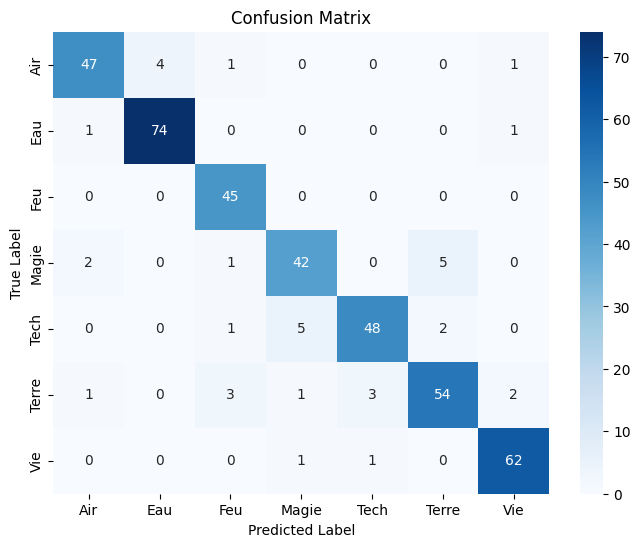

F1 Score: 0.9082292865864295
Precision: 0.9082141626569233
Recall: 0.9100170743570517


In [19]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score


cm = confusion_matrix(all_targets_save, all_predictions_save)
precision = []
recall = []
score_F1 = []
for i in range(len(set(labels))):
    precision.append(cm[i][i] / sum(cm[:,i]))
    recall.append(cm[i][i] / sum(cm[i,:]))
    score_F1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0)

show_matrice_confusion(cm, encoder)
f1_macro = f1_score(all_targets_save, all_predictions_save, average='macro')
print("F1 Score:", f1_macro)
precision_macro = precision_score(all_targets_save, all_predictions_save, average='macro')
recall_macro = recall_score(all_targets_save, all_predictions_save, average='macro')
print("Precision:", precision_macro)
print("Recall:", recall_macro)

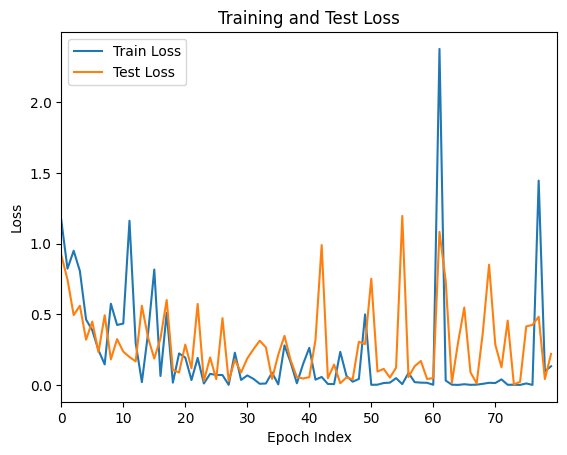

In [17]:
import matplotlib.pyplot as plt

plt.xlim(1, len(loss_train_list))
plt.xticks(range(0, len(loss_train_list), 10))
plt.plot(loss_train_list, label='Train Loss')
plt.plot(loss_test_list, label='Test Loss')
plt.xlabel('Epoch Index')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [ ]:
from torchsummary import summary
import torch

model = CNN(num_classes=7)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 50, 50]             896
       BatchNorm2d-2           [-1, 32, 50, 50]              64
         MaxPool2d-3           [-1, 32, 25, 25]               0
            Conv2d-4           [-1, 64, 25, 25]          18,496
       BatchNorm2d-5           [-1, 64, 25, 25]             128
         MaxPool2d-6           [-1, 64, 12, 12]               0
           Dropout-7           [-1, 64, 12, 12]               0
            Conv2d-8          [-1, 128, 12, 12]          73,856
       BatchNorm2d-9          [-1, 128, 12, 12]             256
        MaxPool2d-10            [-1, 128, 6, 6]               0
           Conv2d-11            [-1, 256, 6, 6]         295,168
      BatchNorm2d-12            [-1, 256, 6, 6]             512
        MaxPool2d-13            [-1, 256, 3, 3]               0
          Dropout-14            [-1, 25